In [39]:
import pandas as pd
from datetime import datetime

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('Admissions Hospitalières Nettoyées.csv')

# Convertir la colonne 'Date d'Entrée' en type datetime
df['Date d\'Entrée'] = pd.to_datetime(df['Date d\'Entrée'])

# Séparer les données de 2024 en deux parties
df_2024 = df[df['Date d\'Entrée'].dt.year == 2024]

# Créer une copie des données pour 2025
df_2025 = df_2024.copy()
df_2023 = df_2024.copy()
df_2022 = df_2024.copy()
df_2021 = df_2024.copy()

# Décaler les dates pour 2025 (on garde le mois et le jour, on change l'année)
df_2025['Date d\'Entrée'] = df_2025['Date d\'Entrée'].apply(lambda x: x.replace(year=2025))
df_2023['Date d\'Entrée'] = df_2023['Date d\'Entrée'].apply(lambda x: x.replace(year=2023))
df_2022['Date d\'Entrée'] = df_2022['Date d\'Entrée'].apply(lambda x: x.replace(year=2022))
df_2021['Date d\'Entrée'] = df_2021['Date d\'Entrée'].apply(lambda x: x.replace(year=2021))

# Maintenant, nous voulons imiter la tendance saisonnière :
# Par exemple, augmenter les valeurs pendant l'hiver (décembre à février) et les diminuer pendant l'été (juin à août)

# Définir une fonction pour ajuster les valeurs en fonction de la saison
def adjust_seasonal_trend_2025(row):
    month = row['Date d\'Entrée'].month
    if month in [12, 1, 2]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 1.1  # Augmenter de 10% pour l'hiver
    elif month in [6, 7, 8]:  # Été
        return row['Durée Hospitalisation (jours)'] * 0.8  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

def adjust_seasonal_trend_2023(row):
    month = row['Date d\'Entrée'].month
    if month in [12, 1, 2, 3]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 1.05  # Augmenter de 10% pour l'hiver
    elif month in [5, 6, 7, 8]:  # Été
        return row['Durée Hospitalisation (jours)'] * 0.9  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

def adjust_seasonal_trend_2022(row):
    month = row['Date d\'Entrée'].month
    if month in [11, 12, 1, 2, 3, 4]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 1.2  # Augmenter de 10% pour l'hiver
    elif month in [5, 6, 7, 8, 9, 10]:  # Été
        return row['Durée Hospitalisation (jours)'] * 0.95  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

def adjust_seasonal_trend_2021(row):
    month = row['Date d\'Entrée'].month
    if month in [12, 1, 2, 3]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 1.2  # Augmenter de 10% pour l'hiver
    elif month in [5, 6, 7, 8, 9]:  # Été
        return row['Durée Hospitalisation (jours)'] * 1.0  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

# Appliquer l'ajustement saisonnier pour les données de 2025
df_2025['Durée Hospitalisation (jours)'] = df_2025.apply(adjust_seasonal_trend_2025, axis=1)
df_2023['Durée Hospitalisation (jours)'] = df_2023.apply(adjust_seasonal_trend_2023, axis=1)
df_2022['Durée Hospitalisation (jours)'] = df_2022.apply(adjust_seasonal_trend_2022, axis=1)
df_2021['Durée Hospitalisation (jours)'] = df_2021.apply(adjust_seasonal_trend_2021, axis=1)

# Fusionner les deux DataFrames (2024 et 2025)
df_final = pd.concat([df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

# Sauvegarder le DataFrame final dans un nouveau fichier CSV
df_final.to_csv('Admissions Hospitalières Nettoyées 2021-2025.csv', index=False)

print("Modification des dates et ajustement saisonnier terminés. Le fichier est sauvegardé sous 'fichier_modifie_avec_saison.csv'.")


Modification des dates et ajustement saisonnier terminés. Le fichier est sauvegardé sous 'fichier_modifie_avec_saison.csv'.


Colonnes du DataFrame :
Index(['ID Patient', 'Date d'Entrée', 'Âge', 'Sexe',
       'Durée Hospitalisation (jours)', 'Type Admission', 'Pathologie'],
      dtype='object')
            patients
mois                
2021-01-01        79
2021-01-02       160
2021-01-03       225
2021-01-04       279
2021-01-05       327
...              ...
2026-02-04         2
2026-02-05         1
2026-02-06         1
2026-02-07         1
2026-02-08         1

[1865 rows x 1 columns]
mois
2021-01-31    14624
2021-02-28    16233
2021-03-31     8544
2021-04-30     5598
2021-05-31     5345
2021-06-30     4703
2021-07-31     5173
2021-08-31     5301
2021-09-30     4873
2021-10-31     5011
2021-11-30    13529
2021-12-31    17102
2022-01-31    16557
2022-02-28    16258
2022-03-31     8544
2022-04-30     6092
2022-05-31     4881
2022-06-30     3973
2022-07-31     4327
2022-08-31     4478
2022-09-30     4085
2022-10-31     4184
2022-11-30    14715
2022-12-31    17786
2023-01-31    15229
2023-02-28    14501
2023-

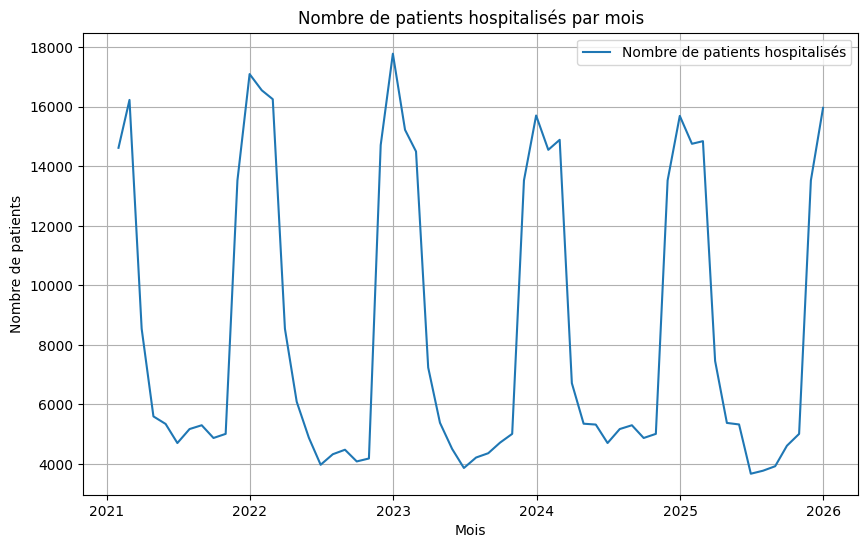

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 📌 Charger et préparer les données médicales
def load_and_prepare_data():
    df = pd.read_csv('Admissions Hospitalières Nettoyées 2021-2025.csv', encoding='utf-8', delimiter=',')
    
    # Supprimer les espaces invisibles autour des noms de colonnes
    df.columns = df.columns.str.strip()

    # Vérification des colonnes
    print("Colonnes du DataFrame :")
    print(df.columns)  # Affichage des colonnes pour vérifier leur contenu exact

    # Sélection des colonnes nécessaires
    selected_columns = ["Date d'Entrée", "Durée Hospitalisation (jours)"]
    df = df[selected_columns]

    # Conversion des dates en format datetime
    df["Date d'Entrée"] = pd.to_datetime(df["Date d'Entrée"], format="%Y-%m-%d", errors='coerce')

    # Assurer que la durée d'hospitalisation est un nombre et remplacer les erreurs par 0
    df["Durée Hospitalisation (jours)"] = pd.to_numeric(df["Durée Hospitalisation (jours)"], errors='coerce').fillna(0)

    # Créer une liste des mois où chaque patient occupe un lit
    nombre_patients_par_mois = []

    for _, row in df.iterrows():
        start_date = row["Date d'Entrée"]
        duration = int(row["Durée Hospitalisation (jours)"])

        # Générer une liste des mois durant lesquels le patient est hospitalisé
        months_range = pd.date_range(start=start_date, periods=duration, freq='D')  # MS : début du mois
        
        # Enregistrer chaque mois où le patient occupe un lit
        for month in months_range:
            nombre_patients_par_mois.append({
                'mois': month,
                'patients': 1
            })

    # Convertir la liste des patients par mois en DataFrame
    df_patients = pd.DataFrame(nombre_patients_par_mois)

    # Grouper par mois et compter le nombre de patients chaque mois
    df_monthly = df_patients.groupby('mois').sum()

    return df_monthly

# Charger les données
df_monthly = load_and_prepare_data()

# Afficher les résultats
print(df_monthly)

df_monthly_agg = df_monthly.resample('ME').sum()  # 'ME' pour la fin du mois

# Convertir en série si nécessaire
df_monthly_agg = df_monthly_agg['patients']

# les dernières valeurs sont souvent très faibles
df_monthly_agg = df_monthly_agg[:-2]

# Vérifier la structure après conversion
print(df_monthly_agg)
print(df_monthly_agg.shape)

# Visualiser les données
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_agg.index, df_monthly_agg, label="Nombre de patients hospitalisés")
plt.title("Nombre de patients hospitalisés par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de patients")
plt.legend()
plt.grid(True)
plt.show()


# Test stationnarité données

In [15]:
from statsmodels.tsa.stattools import adfuller

# Test ADF pour vérifier la stationnarité
result = adfuller(df_monthly_agg)
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")


ADF Statistic: -2.5244817784781546
P-value: 0.10963069893852495


# saisonalité et periodicité

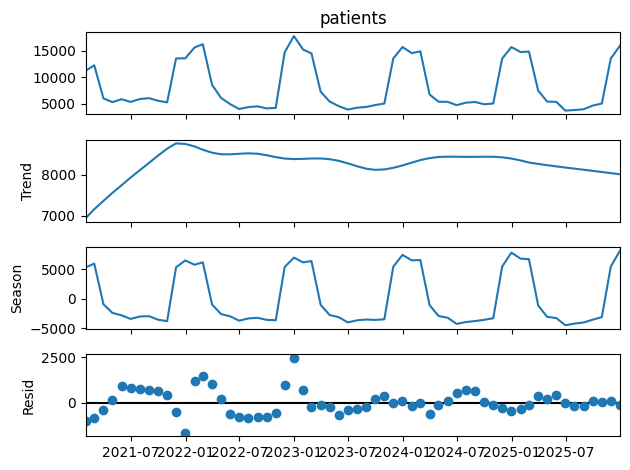

In [16]:
from statsmodels.tsa.seasonal import STL

# Décomposer la série temporelle pour observer la tendance et la saisonnalité
stl = STL(df_monthly_agg, seasonal=13)
result = stl.fit()
result.plot()
plt.show()


les données ne sont pas stationnaires (p-value > 0.05)

In [17]:
df_monthly_agg_diff = df_monthly_agg.diff().dropna()

# Test ADF après différenciation
result_diff = adfuller(df_monthly_agg_diff)
print(f"ADF Statistic après différenciation : {result_diff[0]}")
print(f"P-value après différenciation : {result_diff[1]}")


ADF Statistic après différenciation : -4.100660370157053
P-value après différenciation : 0.0009660930958805518


on comprend donc que d doit être égal à 2

# Grid search avec sarima (les données ont l'air d'avoir une saisonalité anuelle)

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# 📌 Fonction pour tester différents paramètres SARIMA
def test_sarima_parameters(df, p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    results = []  # Liste pour stocker les résultats (modèles, AIC et paramètres)
    
    # Tester différentes combinaisons de (p, d, q) et (P, D, Q) saisonniers
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in m_values:
                                try:
                                    # Créer et ajuster le modèle SARIMA
                                    model = SARIMAX(df, 
                                                    order=(p, d, q), 
                                                    seasonal_order=(P, D, Q, m))
                                    model_fit = model.fit(disp=False)

                                    # Stocker les résultats dans la liste
                                    results.append((model_fit.aic, (p, d, q, P, D, Q, m), model_fit))
                                    print(f'SARIMA({p}, {d}, {q}) x ({P}, {D}, {Q}, {m}) - AIC: {model_fit.aic}')
                                except Exception as e:
                                    print(f"Erreur pour SARIMA({p}, {d}, {q}) x ({P}, {D}, {Q}, {m}): {e}")
    
    # Trier les résultats par AIC croissant
    results.sort(key=lambda x: x[0])  # Tri par AIC (premier élément du tuple)

    # Retourner les 3 meilleurs modèles
    top_3_models = results[:3]
    
    return top_3_models

# Définir les valeurs possibles pour p, d, q, P, D, Q
p_values = range(0, 2)  # Test des valeurs de p de 0 à 2
d_values = [1]  # Test des valeurs de d de 0 à 1
q_values = range(0, 2)  # Test des valeurs de q de 0 à 2

P_values = range(0, 2)  # Test des valeurs de P de 0 à 2
D_values = range(0, 2)  # Test des valeurs de D de 0 à 1
Q_values = range(0, 2)  # Test des valeurs de Q de 0 à 2

m_values = range(2, 13)  # Saison annuelle (12 mois)

# Tester les paramètres SARIMA pour le nombre de lits occupés
top_3_models = test_sarima_parameters(df_monthly_agg, 
                                      p_values, d_values, q_values, 
                                      P_values, D_values, Q_values, 
                                      m_values)

# Afficher les 3 meilleurs modèles trouvés
for i, (aic, order, model) in enumerate(top_3_models, start=1):
    print(f"Top {i} : SARIMA{order} - AIC: {aic}")


SARIMA(0, 1, 0) x (0, 0, 0, 2) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 3) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 4) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 5) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 6) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 7) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 8) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 9) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 10) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 11) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 0, 12) - AIC: 1133.4476837566672
SARIMA(0, 1, 0) x (0, 0, 1, 2) - AIC: 1125.3730143942926
SARIMA(0, 1, 0) x (0, 0, 1, 3) - AIC: 1135.3810345941813
SARIMA(0, 1, 0) x (0, 0, 1, 4) - AIC: 1113.1243131802228
SARIMA(0, 1, 0) x (0, 0, 1, 5) - AIC: 1134.3426640861908
SARIMA(0, 1, 0) x (0, 0, 1, 6) - AIC: 1135.672023349723
SARIMA(0, 1, 0) x (0, 0, 1, 7) - AIC: 1133.364732108811
SARIMA(0, 1, 0) x (0, 0, 1, 8)

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0) x (0, 0, 1, 12) - AIC: 1085.043582152697
SARIMA(0, 1, 0) x (0, 1, 0, 2) - AIC: 1131.1827941062083
SARIMA(0, 1, 0) x (0, 1, 0, 3) - AIC: 1114.3160350357957
SARIMA(0, 1, 0) x (0, 1, 0, 4) - AIC: 1113.4996836873006
SARIMA(0, 1, 0) x (0, 1, 0, 5) - AIC: 1083.5229999713094
SARIMA(0, 1, 0) x (0, 1, 0, 6) - AIC: 1059.8276680142894
SARIMA(0, 1, 0) x (0, 1, 0, 7) - AIC: 1045.7499956898514
SARIMA(0, 1, 0) x (0, 1, 0, 8) - AIC: 1039.4182253881154
SARIMA(0, 1, 0) x (0, 1, 0, 9) - AIC: 1001.443194265541
SARIMA(0, 1, 0) x (0, 1, 0, 10) - AIC: 973.35103771034
SARIMA(0, 1, 0) x (0, 1, 0, 11) - AIC: 946.3707669343521
SARIMA(0, 1, 0) x (0, 1, 0, 12) - AIC: 797.3929880580679
SARIMA(0, 1, 0) x (0, 1, 1, 2) - AIC: 1100.9197102755047
SARIMA(0, 1, 0) x (0, 1, 1, 3) - AIC: 1076.6202415189262
SARIMA(0, 1, 0) x (0, 1, 1, 4) - AIC: 1071.6616535717098
SARIMA(0, 1, 0) x (0, 1, 1, 5) - AIC: 1053.5988299729022
SARIMA(0, 1, 0) x (0, 1, 1, 6) - AIC: 1009.5622099956553
SARIMA(0, 1, 0) x (0, 1, 1, 7) - A

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0) x (0, 1, 1, 11) - AIC: 932.3175880143856
SARIMA(0, 1, 0) x (0, 1, 1, 12) - AIC: 796.1707349314095
SARIMA(0, 1, 0) x (1, 0, 0, 2) - AIC: 1135.102068943294
SARIMA(0, 1, 0) x (1, 0, 0, 3) - AIC: 1135.3754965112198


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0) x (1, 0, 0, 4) - AIC: 1126.5227556206873
SARIMA(0, 1, 0) x (1, 0, 0, 5) - AIC: 1133.9891972421722
SARIMA(0, 1, 0) x (1, 0, 0, 6) - AIC: 1135.3298289134277
SARIMA(0, 1, 0) x (1, 0, 0, 7) - AIC: 1134.0223706027073
SARIMA(0, 1, 0) x (1, 0, 0, 8) - AIC: 1121.6304479092983
SARIMA(0, 1, 0) x (1, 0, 0, 9) - AIC: 1135.3292563202351
SARIMA(0, 1, 0) x (1, 0, 0, 10) - AIC: 1134.084887255418
SARIMA(0, 1, 0) x (1, 0, 0, 11) - AIC: 1133.8907397927414
SARIMA(0, 1, 0) x (1, 0, 0, 12) - AIC: 1047.6699539029948
SARIMA(0, 1, 0) x (1, 0, 1, 2) - AIC: 1120.824220196989
SARIMA(0, 1, 0) x (1, 0, 1, 3) - AIC: 1137.3612947654021
SARIMA(0, 1, 0) x (1, 0, 1, 4) - AIC: 1116.129554055847
SARIMA(0, 1, 0) x (1, 0, 1, 5) - AIC: 1135.5698068116913


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0) x (1, 0, 1, 6) - AIC: 1119.5456153005503
SARIMA(0, 1, 0) x (1, 0, 1, 7) - AIC: 1130.1630364978082
SARIMA(0, 1, 0) x (1, 0, 1, 8) - AIC: 1105.1856604791124
SARIMA(0, 1, 0) x (1, 0, 1, 9) - AIC: 1137.395905363341
SARIMA(0, 1, 0) x (1, 0, 1, 10) - AIC: 1125.1012767763784
SARIMA(0, 1, 0) x (1, 0, 1, 11) - AIC: 1135.1302178539565
SARIMA(0, 1, 0) x (1, 0, 1, 12) - AIC: 1049.0288908169289
SARIMA(0, 1, 0) x (1, 1, 0, 2) - AIC: 1127.7240496468337


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0) x (1, 1, 0, 3) - AIC: 1103.0173861024089
SARIMA(0, 1, 0) x (1, 1, 0, 4) - AIC: 1103.29434381231
SARIMA(0, 1, 0) x (1, 1, 0, 5) - AIC: 1058.7777090862344
SARIMA(0, 1, 0) x (1, 1, 0, 6) - AIC: 950.2906088921648


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 0) x (1, 1, 0, 7) - AIC: 1032.944884227437
SARIMA(0, 1, 0) x (1, 1, 0, 8) - AIC: 1023.6813228221658
SARIMA(0, 1, 0) x (1, 1, 0, 9) - AIC: 989.7417821419901
SARIMA(0, 1, 0) x (1, 1, 0, 10) - AIC: 974.1090182150666
SARIMA(0, 1, 0) x (1, 1, 0, 11) - AIC: 931.234745863959
SARIMA(0, 1, 0) x (1, 1, 0, 12) - AIC: 798.1310892638562
SARIMA(0, 1, 0) x (1, 1, 1, 2) - AIC: 1102.7904772510371
SARIMA(0, 1, 0) x (1, 1, 1, 3) - AIC: 1077.4531966135826
SARIMA(0, 1, 0) x (1, 1, 1, 4) - AIC: 1069.1159576904624
SARIMA(0, 1, 0) x (1, 1, 1, 5) - AIC: 1054.9739815812177
SARIMA(0, 1, 0) x (1, 1, 1, 6) - AIC: 951.4163528123511
SARIMA(0, 1, 0) x (1, 1, 1, 7) - AIC: 1020.8488654464405
SARIMA(0, 1, 0) x (1, 1, 1, 8) - AIC: 996.1381970491427
SARIMA(0, 1, 0) x (1, 1, 1, 9) - AIC: 973.3820069698719


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as startin

SARIMA(0, 1, 0) x (1, 1, 1, 10) - AIC: 964.7572160769553
SARIMA(0, 1, 0) x (1, 1, 1, 11) - AIC: 934.1160245034605
SARIMA(0, 1, 0) x (1, 1, 1, 12) - AIC: 800.7946468804163
SARIMA(0, 1, 1) x (0, 0, 0, 2) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 3) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 4) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 5) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 6) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 7) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 8) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 9) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 10) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 11) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 0, 12) - AIC: 1132.4941919821222
SARIMA(0, 1, 1) x (0, 0, 1, 2) - AIC: 1126.0908521215997
SARIMA(0, 1, 1) x (0, 0, 1, 3) - AIC: 1134.3130228741315
SARIMA(0, 1, 1) x (0, 0, 1, 4) - AIC: 1113.0737345763052
SARIMA(0, 1, 1) x (0, 0, 1, 

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (0, 0, 1, 12) - AIC: 1085.122417315629
SARIMA(0, 1, 1) x (0, 1, 0, 2) - AIC: 1126.7705253839556
SARIMA(0, 1, 1) x (0, 1, 0, 3) - AIC: 1107.2987203105909
SARIMA(0, 1, 1) x (0, 1, 0, 4) - AIC: 1112.7094964251316
SARIMA(0, 1, 1) x (0, 1, 0, 5) - AIC: 1072.314322543584
SARIMA(0, 1, 1) x (0, 1, 0, 6) - AIC: 1057.915851539632
SARIMA(0, 1, 1) x (0, 1, 0, 7) - AIC: 1033.2193272176505
SARIMA(0, 1, 1) x (0, 1, 0, 8) - AIC: 1038.6447908709172
SARIMA(0, 1, 1) x (0, 1, 0, 9) - AIC: 996.9408767437873
SARIMA(0, 1, 1) x (0, 1, 0, 10) - AIC: 969.3149589781669
SARIMA(0, 1, 1) x (0, 1, 0, 11) - AIC: 936.3663876060123
SARIMA(0, 1, 1) x (0, 1, 0, 12) - AIC: 798.1464569805462
SARIMA(0, 1, 1) x (0, 1, 1, 2) - AIC: 1100.1652794356419
SARIMA(0, 1, 1) x (0, 1, 1, 3) - AIC: 1073.8230439836548
SARIMA(0, 1, 1) x (0, 1, 1, 4) - AIC: 1070.8859279245758
SARIMA(0, 1, 1) x (0, 1, 1, 5) - AIC: 1051.8040449223315
SARIMA(0, 1, 1) x (0, 1, 1, 6) - AIC: 1008.3378984711846
SARIMA(0, 1, 1) x (0, 1, 1, 7) - A

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (0, 1, 1, 10) - AIC: 965.0818984863712
SARIMA(0, 1, 1) x (0, 1, 1, 11) - AIC: 934.9666937354459


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (0, 1, 1, 12) - AIC: 797.1867077182185
SARIMA(0, 1, 1) x (1, 0, 0, 2) - AIC: 1134.0861966061343
SARIMA(0, 1, 1) x (1, 0, 0, 3) - AIC: 1134.3274005248422
SARIMA(0, 1, 1) x (1, 0, 0, 4) - AIC: 1126.615882178027
SARIMA(0, 1, 1) x (1, 0, 0, 5) - AIC: 1134.1901352022514
SARIMA(0, 1, 1) x (1, 0, 0, 6) - AIC: 1134.4366297519316
SARIMA(0, 1, 1) x (1, 0, 0, 7) - AIC: 1134.3449949695216
SARIMA(0, 1, 1) x (1, 0, 0, 8) - AIC: 1123.0924055041723
SARIMA(0, 1, 1) x (1, 0, 0, 9) - AIC: 1134.4621780598554
SARIMA(0, 1, 1) x (1, 0, 0, 10) - AIC: 1133.188138184507
SARIMA(0, 1, 1) x (1, 0, 0, 11) - AIC: 1134.222679033914
SARIMA(0, 1, 1) x (1, 0, 0, 12) - AIC: 1048.1798405118875
SARIMA(0, 1, 1) x (1, 0, 1, 2) - AIC: 1121.372440049828
SARIMA(0, 1, 1) x (1, 0, 1, 3) - AIC: 1136.3048073415819
SARIMA(0, 1, 1) x (1, 0, 1, 4) - AIC: 1114.523725623174
SARIMA(0, 1, 1) x (1, 0, 1, 5) - AIC: 1135.9159751565508


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1) x (1, 0, 1, 6) - AIC: 1119.3043837156022
SARIMA(0, 1, 1) x (1, 0, 1, 7) - AIC: 1131.757645608028
SARIMA(0, 1, 1) x (1, 0, 1, 8) - AIC: 1105.781724151753
SARIMA(0, 1, 1) x (1, 0, 1, 9) - AIC: 1136.4482048139448
SARIMA(0, 1, 1) x (1, 0, 1, 10) - AIC: 1124.2625056428255
SARIMA(0, 1, 1) x (1, 0, 1, 11) - AIC: 1136.2937534492596


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (1, 0, 1, 12) - AIC: 1048.511701201229
SARIMA(0, 1, 1) x (1, 1, 0, 2) - AIC: 1127.8809881846626
SARIMA(0, 1, 1) x (1, 1, 0, 3) - AIC: 1099.7684042132091
SARIMA(0, 1, 1) x (1, 1, 0, 4) - AIC: 1104.2119973021481
SARIMA(0, 1, 1) x (1, 1, 0, 5) - AIC: 1053.0923708378418
SARIMA(0, 1, 1) x (1, 1, 0, 6) - AIC: 953.631831974871
SARIMA(0, 1, 1) x (1, 1, 0, 7) - AIC: 1029.6812361664504


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 1) x (1, 1, 0, 8) - AIC: 1025.3797940609188
SARIMA(0, 1, 1) x (1, 1, 0, 9) - AIC: 988.7723037242157
SARIMA(0, 1, 1) x (1, 1, 0, 10) - AIC: 971.2683040531022
SARIMA(0, 1, 1) x (1, 1, 0, 11) - AIC: 933.756386166539
SARIMA(0, 1, 1) x (1, 1, 0, 12) - AIC: 798.9372902363165
SARIMA(0, 1, 1) x (1, 1, 1, 2) - AIC: 1102.0997862131774
SARIMA(0, 1, 1) x (1, 1, 1, 3) - AIC: 1075.4654740803608


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1) x (1, 1, 1, 4) - AIC: 1068.3728413739593
SARIMA(0, 1, 1) x (1, 1, 1, 5) - AIC: 1052.4943116941542
SARIMA(0, 1, 1) x (1, 1, 1, 6) - AIC: 955.2756576922255
SARIMA(0, 1, 1) x (1, 1, 1, 7) - AIC: 1019.8526176652572
SARIMA(0, 1, 1) x (1, 1, 1, 8) - AIC: 996.0531800788365


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1) x (1, 1, 1, 9) - AIC: 970.8606612416928
SARIMA(0, 1, 1) x (1, 1, 1, 10) - AIC: 966.8034032294054


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (1, 1, 1, 11) - AIC: 933.7912709694757


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (1, 1, 1, 12) - AIC: 791.5910003982473
SARIMA(1, 1, 0) x (0, 0, 0, 2) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 3) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 4) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 5) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 6) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 7) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 8) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 9) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 10) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 11) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 0, 12) - AIC: 1133.072635462014
SARIMA(1, 1, 0) x (0, 0, 1, 2) - AIC: 1126.5466463611688
SARIMA(1, 1, 0) x (0, 0, 1, 3) - AIC: 1134.9938410481575
SARIMA(1, 1, 0) x (0, 0, 1, 4) - AIC: 1118.224056078291
SARIMA(1, 1, 0) x (0, 0, 1, 5) - AIC: 1134.698693615561
SARIMA(1, 1, 0) x (0, 0, 1, 6) - AIC: 1135.0726354317621
SARIMA(1, 1, 0) x (0, 0, 1, 7) - AIC: 113

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (0, 0, 1, 12) - AIC: 1085.4792257948206
SARIMA(1, 1, 0) x (0, 1, 0, 2) - AIC: 1132.241778249451
SARIMA(1, 1, 0) x (0, 1, 0, 3) - AIC: 1107.4767628906516
SARIMA(1, 1, 0) x (0, 1, 0, 4) - AIC: 1112.8953768937786
SARIMA(1, 1, 0) x (0, 1, 0, 5) - AIC: 1077.5101046072969
SARIMA(1, 1, 0) x (0, 1, 0, 6) - AIC: 1055.1416820781944
SARIMA(1, 1, 0) x (0, 1, 0, 7) - AIC: 1038.1156921817474
SARIMA(1, 1, 0) x (0, 1, 0, 8) - AIC: 1039.1751037599101
SARIMA(1, 1, 0) x (0, 1, 0, 9) - AIC: 997.1738027119052
SARIMA(1, 1, 0) x (0, 1, 0, 10) - AIC: 974.3797819934183
SARIMA(1, 1, 0) x (0, 1, 0, 11) - AIC: 942.1873847539778
SARIMA(1, 1, 0) x (0, 1, 0, 12) - AIC: 798.5616106350341
SARIMA(1, 1, 0) x (0, 1, 1, 2) - AIC: 1100.105553580702
SARIMA(1, 1, 0) x (0, 1, 1, 3) - AIC: 1073.184219621451
SARIMA(1, 1, 0) x (0, 1, 1, 4) - AIC: 1071.5021746745977
SARIMA(1, 1, 0) x (0, 1, 1, 5) - AIC: 1052.6581161521601
SARIMA(1, 1, 0) x (0, 1, 1, 6) - AIC: 1006.6873424296298
SARIMA(1, 1, 0) x (0, 1, 1, 7) - A

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (0, 1, 1, 10) - AIC: 965.4044287777359
SARIMA(1, 1, 0) x (0, 1, 1, 11) - AIC: 934.3093766024397
SARIMA(1, 1, 0) x (0, 1, 1, 12) - AIC: 797.7272241986658
SARIMA(1, 1, 0) x (1, 0, 0, 2) - AIC: 1134.3488625278048
SARIMA(1, 1, 0) x (1, 0, 0, 3) - AIC: 1134.9933007570176
SARIMA(1, 1, 0) x (1, 0, 0, 4) - AIC: 1127.2807096346596
SARIMA(1, 1, 0) x (1, 0, 0, 5) - AIC: 1134.590990859225


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (1, 0, 0, 6) - AIC: 1135.0726327190846
SARIMA(1, 1, 0) x (1, 0, 0, 7) - AIC: 1134.7565362199032
SARIMA(1, 1, 0) x (1, 0, 0, 8) - AIC: 1123.4742488450931
SARIMA(1, 1, 0) x (1, 0, 0, 9) - AIC: 1135.0649740771164
SARIMA(1, 1, 0) x (1, 0, 0, 10) - AIC: 1134.0655813936787
SARIMA(1, 1, 0) x (1, 0, 0, 11) - AIC: 1135.0613868625871
SARIMA(1, 1, 0) x (1, 0, 0, 12) - AIC: 1048.5511800642228
SARIMA(1, 1, 0) x (1, 0, 1, 2) - AIC: 1121.0616885256934
SARIMA(1, 1, 0) x (1, 0, 1, 3) - AIC: 1136.9933990394925
SARIMA(1, 1, 0) x (1, 0, 1, 4) - AIC: 1115.2127512078391
SARIMA(1, 1, 0) x (1, 0, 1, 5) - AIC: 1136.319610895131
SARIMA(1, 1, 0) x (1, 0, 1, 6) - AIC: 1120.9134015857835
SARIMA(1, 1, 0) x (1, 0, 1, 7) - AIC: 1131.8100141584682
SARIMA(1, 1, 0) x (1, 0, 1, 8) - AIC: 1106.1337276666295
SARIMA(1, 1, 0) x (1, 0, 1, 9) - AIC: 1137.0650583595198
SARIMA(1, 1, 0) x (1, 0, 1, 10) - AIC: 1125.3486968211826
SARIMA(1, 1, 0) x (1, 0, 1, 11) - AIC: 1136.5960053974245


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (1, 0, 1, 12) - AIC: 1048.9472202735558
SARIMA(1, 1, 0) x (1, 1, 0, 2) - AIC: 1128.4622563313335
SARIMA(1, 1, 0) x (1, 1, 0, 3) - AIC: 1098.983379921748
SARIMA(1, 1, 0) x (1, 1, 0, 4) - AIC: 1104.2102864285825
SARIMA(1, 1, 0) x (1, 1, 0, 5) - AIC: 1062.0137973329604


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 0) x (1, 1, 0, 6) - AIC: 954.2729661276538
SARIMA(1, 1, 0) x (1, 1, 0, 7) - AIC: 1032.393132393583
SARIMA(1, 1, 0) x (1, 1, 0, 8) - AIC: 1026.356494986591
SARIMA(1, 1, 0) x (1, 1, 0, 9) - AIC: 986.3741316104289
SARIMA(1, 1, 0) x (1, 1, 0, 10) - AIC: 974.9461980013222
SARIMA(1, 1, 0) x (1, 1, 0, 11) - AIC: 934.4517236336409
SARIMA(1, 1, 0) x (1, 1, 0, 12) - AIC: 799.4130242362322
SARIMA(1, 1, 0) x (1, 1, 1, 2) - AIC: 1102.1029520964787
SARIMA(1, 1, 0) x (1, 1, 1, 3) - AIC: 1074.7351079313216


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0) x (1, 1, 1, 4) - AIC: 1069.2713834106057
SARIMA(1, 1, 0) x (1, 1, 1, 5) - AIC: 1054.3922282895373
SARIMA(1, 1, 0) x (1, 1, 1, 6) - AIC: 953.0222664450922
SARIMA(1, 1, 0) x (1, 1, 1, 7) - AIC: 1020.4216282585868
SARIMA(1, 1, 0) x (1, 1, 1, 8) - AIC: 996.2903948754235
SARIMA(1, 1, 0) x (1, 1, 1, 9) - AIC: 969.8750047447314
SARIMA(1, 1, 0) x (1, 1, 1, 10) - AIC: 965.1754254378606
SARIMA(1, 1, 0) x (1, 1, 1, 11) - AIC: 936.151867467611


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (1, 1, 1, 12) - AIC: 791.8855672044899
SARIMA(1, 1, 1) x (0, 0, 0, 2) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 3) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 4) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 5) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 6) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 7) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 8) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 9) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 10) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 11) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 0, 12) - AIC: 1128.1297344245088
SARIMA(1, 1, 1) x (0, 0, 1, 2) - AIC: 1126.1091518987805
SARIMA(1, 1, 1) x (0, 0, 1, 3) - AIC: 1130.314140126777
SARIMA(1, 1, 1) x (0, 0, 1, 4) - AIC: 1113.5580638916824
SARIMA(1, 1, 1) x (0, 0, 1, 5) - AIC: 1130.1006597683358
SARIMA(1, 1, 1) x (0, 0, 1, 6) - AIC: 1130.0450515642324
SARIMA(1, 1, 1) x (0, 0, 1, 7

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (0, 0, 1, 12) - AIC: 1086.1166642897504
SARIMA(1, 1, 1) x (0, 1, 0, 2) - AIC: 1116.9006716433046
SARIMA(1, 1, 1) x (0, 1, 0, 3) - AIC: 1108.5605304432436
SARIMA(1, 1, 1) x (0, 1, 0, 4) - AIC: 1103.4954813656418
SARIMA(1, 1, 1) x (0, 1, 0, 5) - AIC: 1073.132855562227
SARIMA(1, 1, 1) x (0, 1, 0, 6) - AIC: 1055.3918648719339
SARIMA(1, 1, 1) x (0, 1, 0, 7) - AIC: 1034.540407518119
SARIMA(1, 1, 1) x (0, 1, 0, 8) - AIC: 1030.5139371275727
SARIMA(1, 1, 1) x (0, 1, 0, 9) - AIC: 998.5111669184205
SARIMA(1, 1, 1) x (0, 1, 0, 10) - AIC: 965.1477051643859
SARIMA(1, 1, 1) x (0, 1, 0, 11) - AIC: 935.9921595289172
SARIMA(1, 1, 1) x (0, 1, 0, 12) - AIC: 799.3216620797398
SARIMA(1, 1, 1) x (0, 1, 1, 2) - AIC: 1098.7830832947689
SARIMA(1, 1, 1) x (0, 1, 1, 3) - AIC: 1075.183054382788


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (0, 1, 1, 4) - AIC: 1068.8740816982993
SARIMA(1, 1, 1) x (0, 1, 1, 5) - AIC: 1049.298244164355
SARIMA(1, 1, 1) x (0, 1, 1, 6) - AIC: 1007.581260056056


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (0, 1, 1, 7) - AIC: 1015.8228989938996
SARIMA(1, 1, 1) x (0, 1, 1, 8) - AIC: 998.7644473561338
SARIMA(1, 1, 1) x (0, 1, 1, 9) - AIC: 970.7353020632473


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (0, 1, 1, 10) - AIC: 962.6057140881588


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (0, 1, 1, 11) - AIC: 930.7693236059756
SARIMA(1, 1, 1) x (0, 1, 1, 12) - AIC: 797.6039137017982


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (1, 0, 0, 2) - AIC: 1130.6340780005391
SARIMA(1, 1, 1) x (1, 0, 0, 3) - AIC: 1130.352424246132
SARIMA(1, 1, 1) x (1, 0, 0, 4) - AIC: 1123.913707367477
SARIMA(1, 1, 1) x (1, 0, 0, 5) - AIC: 1129.8568377187066
SARIMA(1, 1, 1) x (1, 0, 0, 6) - AIC: 1129.9090987100994
SARIMA(1, 1, 1) x (1, 0, 0, 7) - AIC: 1130.1296590706868
SARIMA(1, 1, 1) x (1, 0, 0, 8) - AIC: 1119.3547744389375
SARIMA(1, 1, 1) x (1, 0, 0, 9) - AIC: 1130.5461595175595
SARIMA(1, 1, 1) x (1, 0, 0, 10) - AIC: 1128.5146458396437
SARIMA(1, 1, 1) x (1, 0, 0, 11) - AIC: 1130.5922242174465


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 0, 12) - AIC: 1049.2796563759832


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 2) - AIC: 1122.780497136262
SARIMA(1, 1, 1) x (1, 0, 1, 3) - AIC: 1132.2975957238757
SARIMA(1, 1, 1) x (1, 0, 1, 4) - AIC: 1115.1843318980812
SARIMA(1, 1, 1) x (1, 0, 1, 5) - AIC: 1130.4693843422674


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 6) - AIC: 1114.17988235629


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 7) - AIC: 1127.3496737228672
SARIMA(1, 1, 1) x (1, 0, 1, 8) - AIC: 1105.781813156346


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 9) - AIC: 1131.046773924711


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 10) - AIC: 1118.1694618251236
SARIMA(1, 1, 1) x (1, 0, 1, 11) - AIC: 1132.0682735964156


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 12) - AIC: 1051.6347578991706
SARIMA(1, 1, 1) x (1, 1, 0, 2) - AIC: 1116.206354024708
SARIMA(1, 1, 1) x (1, 1, 0, 3) - AIC: 1101.0022195062747
SARIMA(1, 1, 1) x (1, 1, 0, 4) - AIC: 1094.216639912378
SARIMA(1, 1, 1) x (1, 1, 0, 5) - AIC: 1049.50089977257


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 1) x (1, 1, 0, 6) - AIC: 951.8248706221228
SARIMA(1, 1, 1) x (1, 1, 0, 7) - AIC: 1028.4896481268788
SARIMA(1, 1, 1) x (1, 1, 0, 8) - AIC: 1027.3929760336875
SARIMA(1, 1, 1) x (1, 1, 0, 9) - AIC: 988.588038464419
SARIMA(1, 1, 1) x (1, 1, 0, 10) - AIC: 966.9757388128249
SARIMA(1, 1, 1) x (1, 1, 0, 11) - AIC: 929.5774578376759
SARIMA(1, 1, 1) x (1, 1, 0, 12) - AIC: 799.7935454553328


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 2) - AIC: 1099.9689258394715


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 3) - AIC: 1076.6704216389076


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 4) - AIC: 1067.1123207589608
SARIMA(1, 1, 1) x (1, 1, 1, 5) - AIC: 1048.639577818238
SARIMA(1, 1, 1) x (1, 1, 1, 6) - AIC: 955.6711045543298


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 7) - AIC: 1017.8110407441143


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 8) - AIC: 995.114576555774


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 9) - AIC: 971.8493465412603
SARIMA(1, 1, 1) x (1, 1, 1, 10) - AIC: 960.1203012269262


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (1, 1, 1, 11) - AIC: 931.5679990499809


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (1, 1, 1, 12) - AIC: 792.2941908639601
Top 1 : SARIMA(0, 1, 1, 1, 1, 1, 12) - AIC: 791.5910003982473
Top 2 : SARIMA(1, 1, 0, 1, 1, 1, 12) - AIC: 791.8855672044899
Top 3 : SARIMA(1, 1, 1, 1, 1, 1, 12) - AIC: 792.2941908639601


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


les AIC sont très hauts, on essaye avec un simple modèle ARIMA

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# 📌 Fonction pour tester différents paramètres SARIMA
def test_sarima_parameters(df, p_values, d_values, q_values):
    results = []  # Liste pour stocker les résultats (modèles, AIC et paramètres)
    
    # Tester différentes combinaisons de (p, d, q) et (P, D, Q) saisonniers
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Créer et ajuster le modèle SARIMA
                    model = SARIMAX(df, 
                        order=(p, d, q))
                    model_fit = model.fit(disp=False)

                    # Stocker les résultats dans la liste
                    results.append((model_fit.aic, (p, d, q), model_fit))
                    print(f'SARIMA({p}, {d}, {q}) - AIC: {model_fit.aic}')
                except Exception as e:
                    print(f"Erreur pour SARIMA({p}, {d}, {q}) : {e}")
    
    # Trier les résultats par AIC croissant
    results.sort(key=lambda x: x[0])  # Tri par AIC (premier élément du tuple)

    # Retourner les 3 meilleurs modèles
    top_3_models = results[:3]
    
    return top_3_models

# Définir les valeurs possibles pour p, d, q, P, D, Q
p_values = range(0, 10)  # Test des valeurs de p de 0 à 2
d_values = [1]  # Test des valeurs de d de 0 à 1
q_values = range(0, 10)  # Test des valeurs de q de 0 à 2

# Tester les paramètres SARIMA pour le nombre de lits occupés
top_3_models = test_sarima_parameters(df_monthly_agg, 
                                      p_values, d_values, q_values)

# Afficher les 3 meilleurs modèles trouvés
for i, (aic, order, model) in enumerate(top_3_models, start=1):
    print(f"Top {i} : SARIMA{order} - AIC: {aic}")


SARIMA(0, 1, 0) - AIC: 1133.4476837566672
SARIMA(0, 1, 1) - AIC: 1132.4941919821222
SARIMA(0, 1, 2) - AIC: 1126.2374298020368
SARIMA(0, 1, 3) - AIC: 1132.4390118194704
SARIMA(0, 1, 4) - AIC: 1114.4464622386186


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  w

SARIMA(0, 1, 5) - AIC: 1116.7205537559687


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(0, 1, 6) - AIC: 1115.8742758549938


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(0, 1, 7) - AIC: 1113.7065495116328


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(0, 1, 8) - AIC: 1126.7685443751566


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 9) - AIC: 1120.5151824796433
SARIMA(1, 1, 0) - AIC: 1133.072635462014
SARIMA(1, 1, 1) - AIC: 1128.1297344245088
SARIMA(1, 1, 2) - AIC: 1124.1890995161652
SARIMA(1, 1, 3) - AIC: 1127.6312776204147


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 4) - AIC: 1116.3063155497593


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 5) - AIC: 1119.067538401649


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 6) - AIC: 1122.2987493006594


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 7) - AIC: 1122.7995161304736


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 8) - AIC: 1127.456571185536


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 9) - AIC: 1117.575406236283
SARIMA(2, 1, 0) - AIC: 1134.2706429634193
SARIMA(2, 1, 1) - AIC: 1123.7701238964678
SARIMA(2, 1, 2) - AIC: 1123.1089110643616


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(2, 1, 3) - AIC: 1124.5222418055569
SARIMA(2, 1, 4) - AIC: 1119.3894637296726


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(2, 1, 5) - AIC: 1120.2740105273806


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 6) - AIC: 1119.3298637079104
SARIMA(2, 1, 7) - AIC: 1122.3687116182039


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 8) - AIC: 1128.7369044838256


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 9) - AIC: 1116.452914037038
SARIMA(3, 1, 0) - AIC: 1136.2564798389608
SARIMA(3, 1, 1) - AIC: 1132.3749938035944


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2) - AIC: 1123.0561774142068


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 3) - AIC: 1120.6297440755652


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 4) - AIC: 1117.725344842701


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 5) - AIC: 1121.969619959672


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 6) - AIC: 1123.708532759887


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 7) - AIC: 1123.2720082138717


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 8) - AIC: 1130.4430766091618


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 9) - AIC: 1117.4504571212597
SARIMA(4, 1, 0) - AIC: 1128.7764974399765
SARIMA(4, 1, 1) - AIC: 1130.7710832912826


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2) - AIC: 1116.671247269237


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 3) - AIC: 1113.8392146218573
SARIMA(4, 1, 4) - AIC: 1119.8458591941553


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 5) - AIC: 1115.2668782176397


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 6) - AIC: 1113.351151515919


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 7) - AIC: 1119.3762353099125


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 8) - AIC: 1118.9382619939677


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 9) - AIC: 1111.7478950204904
SARIMA(5, 1, 0) - AIC: 1130.7713441831563
SARIMA(5, 1, 1) - AIC: 1129.9835673808725


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 2) - AIC: 1118.0664986661432
SARIMA(5, 1, 3) - AIC: 1113.8700799615365


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 4) - AIC: 1116.7193242289025


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 5) - AIC: 1115.8313141875494


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 6) - AIC: 1117.0150462932088
SARIMA(5, 1, 7) - AIC: 1118.8533585382552


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 8) - AIC: 1117.71916849688


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 9) - AIC: 1110.3171393910825
SARIMA(6, 1, 0) - AIC: 1132.2248686374294


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 1) - AIC: 1115.8488442714608
SARIMA(6, 1, 2) - AIC: 1123.0098153248089


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 3) - AIC: 1131.4525562483805


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(6, 1, 4) - AIC: 1118.0825352326938
SARIMA(6, 1, 5) - AIC: 1117.9467962145502


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 6) - AIC: 1115.4568532680946


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 7) - AIC: 1119.5358785505857


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 8) - AIC: 1118.5824081631044


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(6, 1, 9) - AIC: 1112.2969887810589
SARIMA(7, 1, 0) - AIC: 1132.5455105867477


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(7, 1, 1) - AIC: 1109.0284142818089


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 2) - AIC: 1118.612939271025


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 3) - AIC: 1110.4958332678557


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 4) - AIC: 1106.8320231665905


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 5) - AIC: 1107.6056471802822


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 6) - AIC: 1111.8193714580987


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(7, 1, 7) - AIC: 1112.9186608773193


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 8) - AIC: 1113.380739316625


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(7, 1, 9) - AIC: 1104.713061427587
SARIMA(8, 1, 0) - AIC: 1079.7855302875496
SARIMA(8, 1, 1) - AIC: 1079.4207193006855
SARIMA(8, 1, 2) - AIC: 1079.9272487191206


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zero

SARIMA(8, 1, 3) - AIC: 1068.3130899119797


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 4) - AIC: 1088.6081509159872


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 5) - AIC: 1082.4778919412788


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 6) - AIC: 1059.1074077492804


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 7) - AIC: 1059.5738090714894


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 8) - AIC: 1061.1956944397139


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(8, 1, 9) - AIC: 1100.2417917083817
SARIMA(9, 1, 0) - AIC: 1081.1333494382682


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(9, 1, 1) - AIC: 1081.1430736146826


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(9, 1, 2) - AIC: 1081.8668454415256


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(9, 1, 3) - AIC: 1068.0027197465324


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 4) - AIC: 1089.9681520267252


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 5) - AIC: 1077.9794256875591


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 6) - AIC: 1060.2873633253369


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 7) - AIC: 1060.4483886980197


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 8) - AIC: 1063.612467159815
SARIMA(9, 1, 9) - AIC: 1097.6606857152267
Top 1 : SARIMA(8, 1, 6) - AIC: 1059.1074077492804
Top 2 : SARIMA(8, 1, 7) - AIC: 1059.5738090714894
Top 3 : SARIMA(9, 1, 6) - AIC: 1060.2873633253369


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


première visualisation du modèle avec le meilleur aic

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


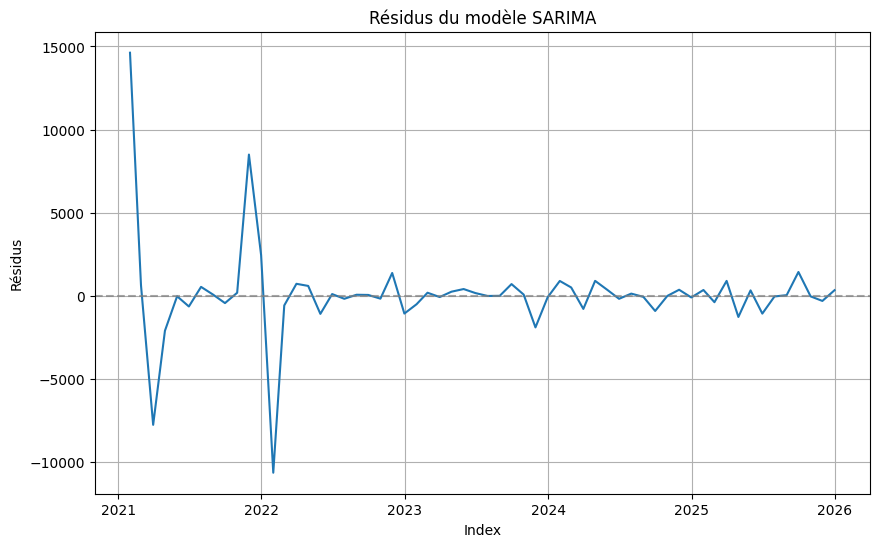

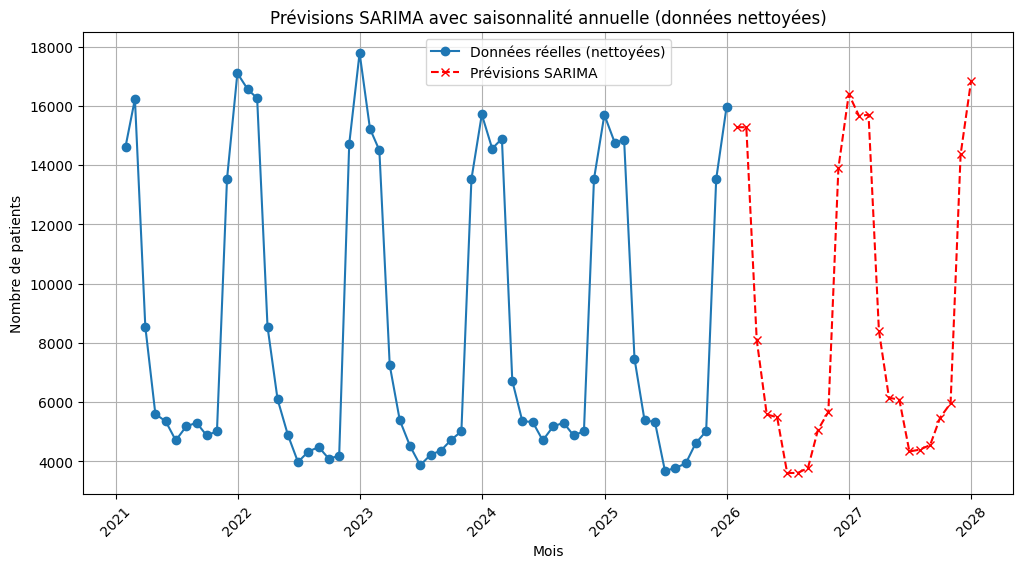

Moyenne des résidus : 98.81


In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Créer le modèle SARIMA
best_model = SARIMAX(df_monthly_agg, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))

# Ajuster le modèle
model_fit = best_model.fit(disp=False)

# Nombre de mois à prédire
forecast_steps = 24

# Générer les prévisions
forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Créer l'index de prévision
forecast_index = pd.date_range(start=df_monthly_agg.index[-1], periods=forecast_steps + 1, freq='ME')[1:]


residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
plt.title("Résidus du modèle SARIMA")
plt.xlabel("Index")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_agg, label="Données réelles (nettoyées)", marker='o')
plt.plot(forecast_index, forecast, label="Prévisions SARIMA", color='red', linestyle='dashed', marker='x')
plt.title("Prévisions SARIMA avec saisonnalité annuelle (données nettoyées)")
plt.xlabel("Mois")
plt.ylabel("Nombre de patients")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


les prédictions décroient, sûrement à cause des très gros pics alant de 50 000 à 200 000 2 fois par an

In [25]:

# Afficher le résumé du modèle
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                           patients   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -391.796
Date:                            Wed, 12 Mar 2025   AIC                            791.591
Time:                                    23:46:09   BIC                            798.992
Sample:                                01-31-2021   HQIC                           794.376
                                     - 12-31-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1376      0.208      0.663      0.507      -0.269       0.544
ar.S.L12      -0.5325      0.181   

Prévisions SARIMA (10 premières valeurs) :
 2026-01-31    14989.185552
2026-02-28    14724.071176
2026-03-31     7706.336138
2026-04-30     5266.477055
2026-05-31     5186.885603
2026-06-30     3240.779273
2026-07-31     3211.295996
2026-08-31     3381.255121
2026-09-30     4828.843235
2026-10-31     5476.949549
Freq: ME, Name: predicted_mean, dtype: float64


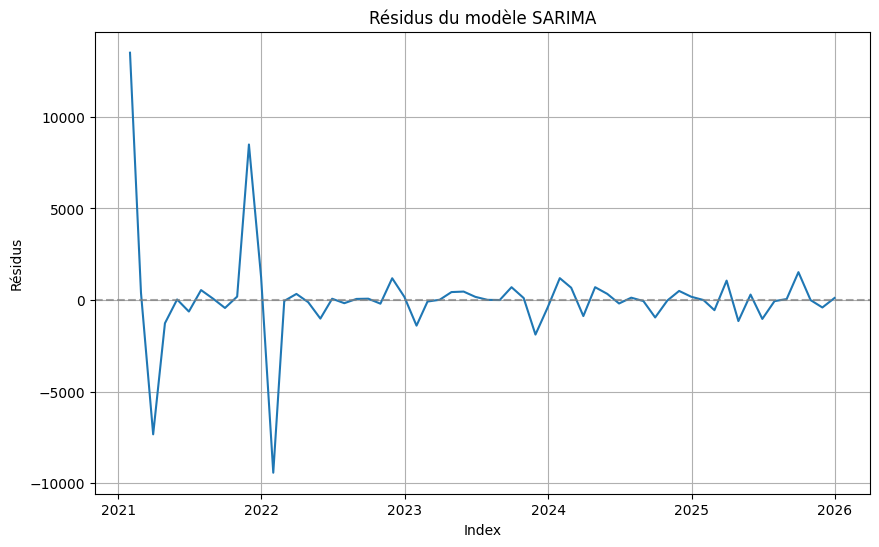

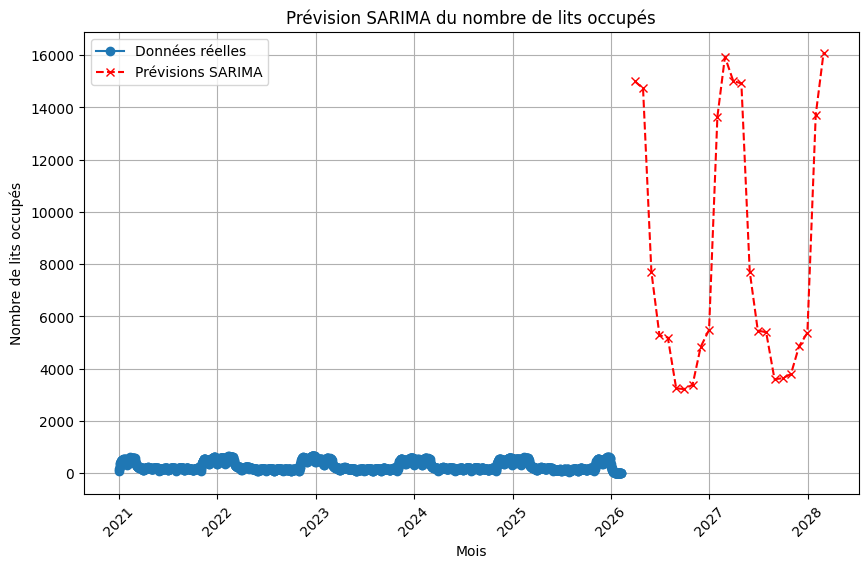

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Nombre de mois à prédire
forecast_steps = 24  # 12 mois

# Vérifier si le modèle a été ajusté correctement
if model_fit is not None:
    # Générer les prévisions avec le meilleur modèle
    forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean

    # Vérifier les prévisions pour détecter des anomalies
    print("Prévisions SARIMA (10 premières valeurs) :\n", forecast[:10])

    # Vérification des résidus
    if hasattr(model_fit, "resid"):
        residuals = model_fit.resid
        plt.figure(figsize=(10, 6))
        plt.plot(residuals)
        plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
        plt.title("Résidus du modèle SARIMA")
        plt.xlabel("Index")
        plt.ylabel("Résidus")
        plt.grid(True)
        plt.show()
    else:
        print("Aucun résidu disponible.")

    # Création de l'index de prévision pour les prochains mois
    forecast_index = pd.date_range(start=df_monthly.index[-1], periods=forecast_steps + 1, freq='ME')[1:]

    # Visualisation des prévisions
    plt.figure(figsize=(10, 6))
    plt.plot(df_monthly.index, df_monthly['patients'], label="Données réelles", marker='o')
    plt.plot(forecast_index, forecast, label="Prévisions SARIMA", color='red', linestyle='dashed', marker='x')
    plt.title("Prévision SARIMA du nombre de lits occupés")
    plt.xlabel("Mois")
    plt.ylabel("Nombre de lits occupés")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Le modèle n'a pas été ajusté correctement.")


Prévisions SARIMA (10 premières valeurs) :
 2026-01-31    14643.467233
2026-02-28    14190.093626
2026-03-31     7240.465662
2026-04-30     5120.126759
2026-05-31     5210.289518
2026-06-30     3293.136011
2026-07-31     3299.038720
2026-08-31     3478.117079
2026-09-30     4878.347742
2026-10-31     5395.962000
Freq: ME, Name: predicted_mean, dtype: float64


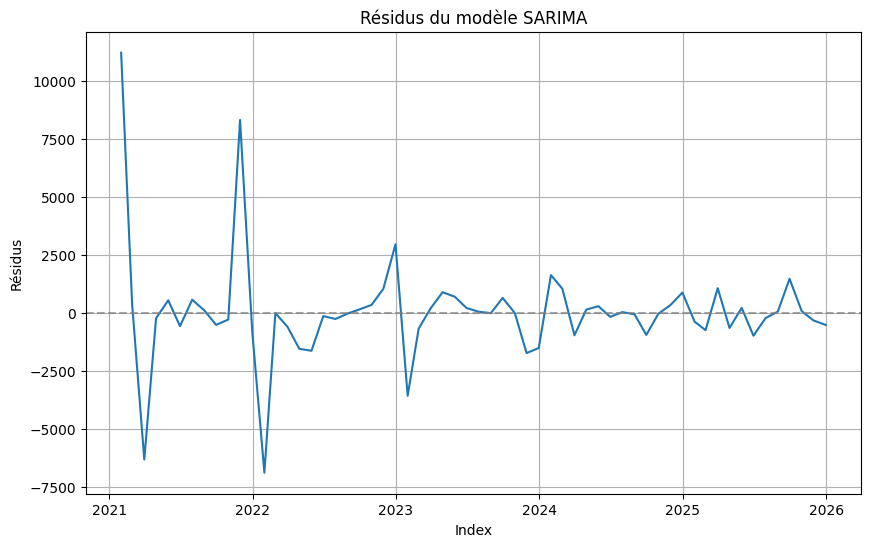

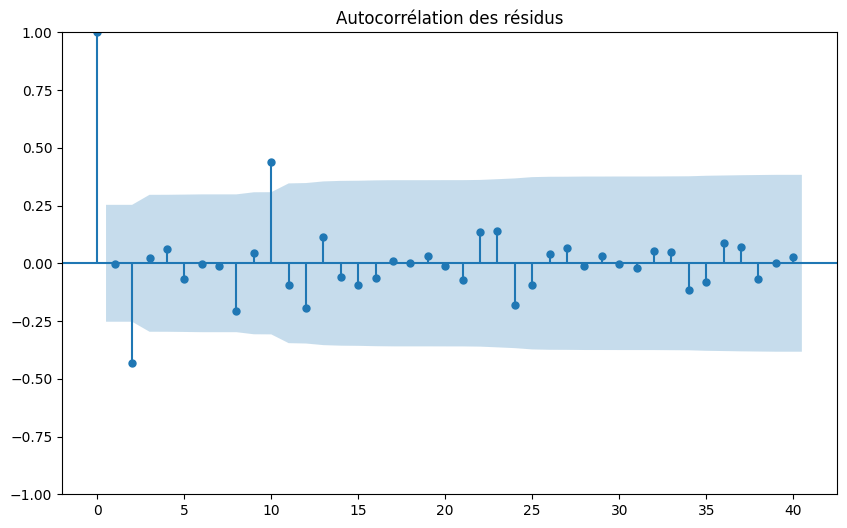

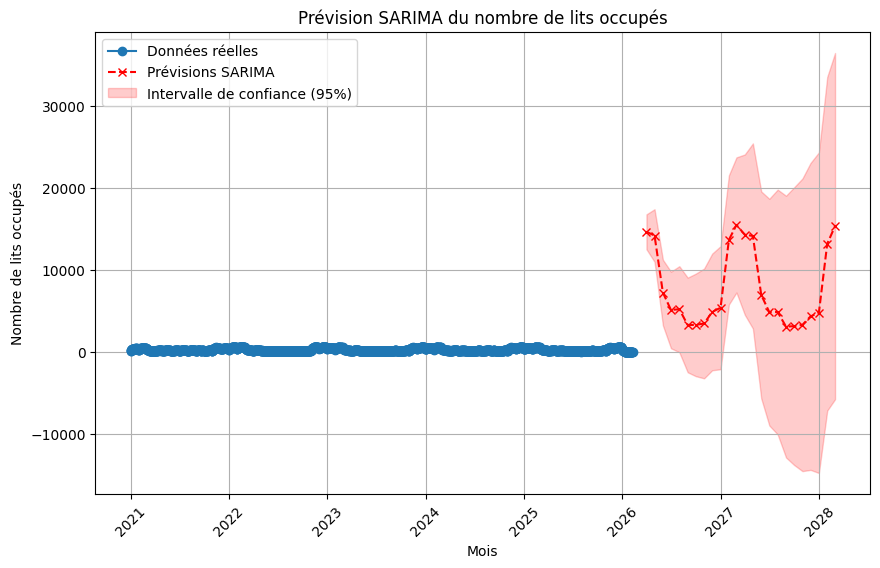

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Nombre de mois à prédire
forecast_steps = 24  # 12 mois

# Vérifier si le modèle a été ajusté correctement
if model_fit is not None and hasattr(model_fit, 'aic'):
    # Générer les prévisions avec le meilleur modèle
    forecast_mean = model_fit.get_forecast(steps=forecast_steps).predicted_mean
    forecast_conf_int = model_fit.get_forecast(steps=forecast_steps).conf_int()

    # Vérifier les prévisions pour détecter des anomalies
    print("Prévisions SARIMA (10 premières valeurs) :\n", forecast_mean[:10])

    # Vérification des résidus
    if hasattr(model_fit, "resid"):
        residuals = model_fit.resid
        plt.figure(figsize=(10, 6))
        plt.plot(residuals)
        plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
        plt.title("Résidus du modèle SARIMA")
        plt.xlabel("Index")
        plt.ylabel("Résidus")
        plt.grid(True)
        plt.show()

        # Autocorrélation des résidus
        plt.figure(figsize=(10, 6))
        plot_acf(residuals, lags=40, ax=plt.gca())
        plt.title("Autocorrélation des résidus")
        plt.show()

    else:
        print("Aucun résidu disponible.")

    # Création de l'index de prévision pour les prochains mois
    forecast_index = pd.date_range(start=df_monthly.index[-1], periods=forecast_steps + 1, freq='ME')[1:]

    # Visualisation des prévisions avec intervalles de confiance
    plt.figure(figsize=(10, 6))
    plt.plot(df_monthly.index, df_monthly['patients'], label="Données réelles", marker='o')
    plt.plot(forecast_index, forecast_mean, label="Prévisions SARIMA", color='red', linestyle='dashed', marker='x')
    plt.fill_between(forecast_index, 
                     forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], 
                     color='red', alpha=0.2, label="Intervalle de confiance (95%)")
    plt.title("Prévision SARIMA du nombre de lits occupés")
    plt.xlabel("Mois")
    plt.ylabel("Nombre de lits occupés")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

else:
    print("Le modèle n'a pas été ajusté correctement.")
